In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [42]:
X_train.shape

(50000, 32, 32, 3)

In [45]:
y_train[:15]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)

In [14]:
y_test = y_test.reshape(-1,)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
def plot_sample(X, y , index):
    plt.figure(figsize =(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

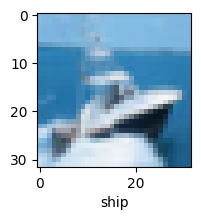

In [23]:
plot_sample(X_train, y_train,8)

In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\niraj.meshram\AppData\Local\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3039 - loss: 1.9266
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4201 - loss: 1.6453
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4506 - loss: 1.5565
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4772 - loss: 1.4852
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4947 - loss: 1.4356


In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.32      0.44      1000
           1       0.77      0.24      0.37      1000
           2       0.30      0.47      0.36      1000
           3       0.31      0.35      0.33      1000
           4       0.41      0.39      0.40      1000
           5       0.40      0.36      0.38      1000
           6       0.44      0.67      0.53      1000
           7       0.58      0.52      0.55      1000
           8       0.71      0.50      0.59      1000
           9       0.44      0.71      0.55      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\niraj.meshram\AppData\Local\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3679 - loss: 1.7500
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5972 - loss: 1.1482
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6476 - loss: 1.0129
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6824 - loss: 0.9149
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7068 - loss: 0.8400
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7297 - loss: 0.7799
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7403 - loss: 0.7373
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7651 - loss: 0.6784
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7762 - loss: 0.6438
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7826 - loss: 0.6154


In [33]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7014 - loss: 0.9164


[0.9191025495529175, 0.699999988079071]

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[3.7367009e-03, 7.2556507e-04, 1.6415829e-03, 9.1189969e-01,
        2.4390519e-03, 6.2012389e-02, 1.0860393e-02, 3.6725393e-04,
        6.2747560e-03, 4.2672105e-05],
       [4.6374453e-03, 1.0597230e-02, 4.2453335e-06, 5.6066374e-06,
        3.5123887e-07, 2.2031129e-07, 5.3744685e-07, 1.1649732e-08,
        9.8423529e-01, 5.1900255e-04],
       [1.0859802e-02, 1.4431176e-01, 4.5157957e-04, 3.5747166e-03,
        2.2318022e-04, 4.5377697e-04, 6.1264267e-04, 2.2481191e-03,
        7.0258057e-01, 1.3468376e-01],
       [9.7173971e-01, 1.2616783e-02, 1.2072689e-03, 7.3529070e-04,
        2.0960110e-04, 3.2494547e-05, 6.3058996e-04, 5.0229381e-04,
        1.2241675e-02, 8.4371386e-05],
       [4.4785750e-08, 9.7159534e-07, 3.3358610e-03, 5.8763446e-03,
        3.0834377e-01, 4.2668711e-05, 6.8239319e-01, 3.9591046e-06,
        3.1898849e-06, 6.2225610e-08]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

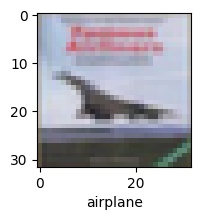

In [38]:
plot_sample(X_test, y_test,3)

In [39]:
classes[y_classes[3]]

'airplane'

In [40]:
classes[y_classes[3]]

'airplane'